In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# !unzip /content/drive/MyDrive/intership/archive2.zip -d /content/drive/MyDrive/intership/

In [3]:
!pip install tensorflow

ERROR: Could not find a version that satisfies the requirement tensorflowhub (from versions: none)
ERROR: No matching distribution found for tensorflowhub


In [40]:
# !pip install opencv-python

In [2]:
import numpy as np 
from tqdm import tqdm
import cv2
import os
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input
from keras import layers
from keras.models import Model, Sequential
from keras.optimizers import Adam, RMSprop
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator
init_notebook_mode(connected=True)
RANDOM_SEED = 123

ModuleNotFoundError: No module named 'tensorflow_hub'

In [1]:
TRAIN_DIR = ('/content/drive/MyDrive/intership/data/archive1/train/')
TEST_DIR = ('/content/drive/MyDrive/intership/data/archive1/test/')

In [43]:
def load_data(dir_path, IMG_SIZE):
   
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(dir_path + path):
                if not file.startswith('.'):
                    img = cv2.imread(dir_path + path + '/' + file)
                    img = img.astype('float32') / 255
                    resized = cv2.resize(img, IMG_SIZE, interpolation = cv2.INTER_AREA)
                    X.append(resized)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [44]:
IMG_SIZE= (48, 48)

In [45]:
X_train, y_train, train_labels = load_data(TRAIN_DIR, IMG_SIZE)

100%|██████████| 7/7 [00:34<00:00,  4.99s/it]

13288 images loaded from /content/drive/MyDrive/intership/data/archive1/train/ directory.


In [46]:
train_labels

{0: 'angry',
 1: 'disgust',
 2: 'fear',
 3: 'happy',
 4: 'neutral',
 5: 'sad',
 6: 'surprise'}

In [49]:
X_test, y_test, test_labels = load_data(TEST_DIR,IMG_SIZE)

100%|██████████| 7/7 [00:11<00:00,  1.68s/it]

4405 images loaded from /content/drive/MyDrive/intership/data/archive1/test/ directory.


In [50]:
def plot_samples(X, y, labels_dict, n=50):
   
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(10,3))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle(labels_dict[index])
        plt.show()

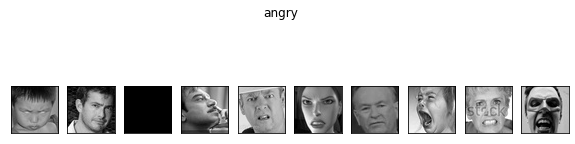

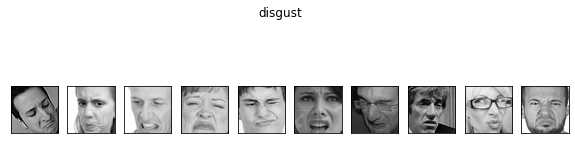

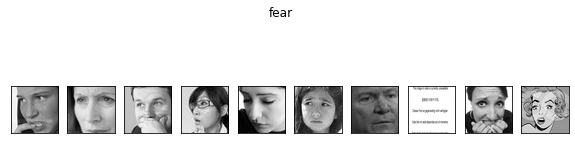

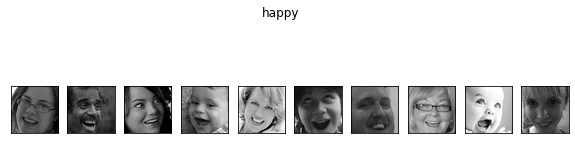

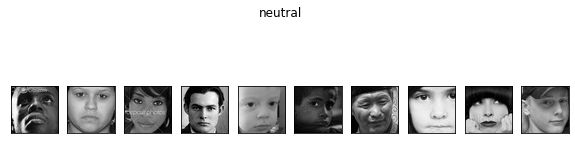

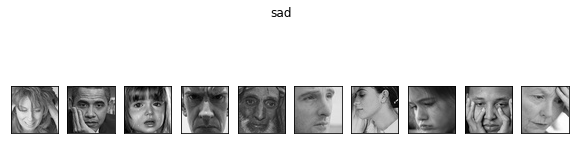

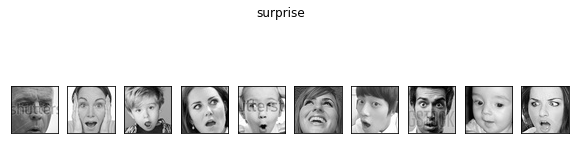

In [51]:
plot_samples(X_train, y_train, train_labels, 10)

In [53]:
from keras.utils.np_utils import to_categorical

Y_train = to_categorical(y_train, num_classes=7)
Y_train.shape

(13288, 7)

In [54]:
Y_test = to_categorical(y_test, num_classes=7)
Y_test.shape

(4405, 7)

In [55]:
from keras.applications.vgg16 import VGG16

base_model = VGG16(
        weights=None,
        include_top=False, 
        input_shape=IMG_SIZE + (3,)
    )

base_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0     

In [56]:
NUM_CLASSES = 7

model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1000, activation="relu"))
model.add(Dropout(0.4))
model.add(Dense(NUM_CLASSES, activation="softmax"))

In [57]:
def deep_model(model, X_train, Y_train, epochs, batch_size):
   
    model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=1e-4),
    metrics=['accuracy'])
    
    history = model.fit(X_train
                       , Y_train
                       , epochs=epochs
                       , batch_size=batch_size
                       , verbose=1)
    return history

In [58]:
epochs = 50
batch_size = 64

history = deep_model(model, X_train, Y_train, epochs, batch_size)

Epoch 1/50
208/208 [==============================] - 18s 67ms/step - loss: 0.4237 - accuracy: 0.2521
Epoch 2/50
208/208 [==============================] - 13s 63ms/step - loss: 0.3969 - accuracy: 0.2626
Epoch 3/50
208/208 [==============================] - 13s 63ms/step - loss: 0.3942 - accuracy: 0.2644
Epoch 4/50
208/208 [==============================] - 13s 63ms/step - loss: 0.3936 - accuracy: 0.2666
Epoch 5/50
208/208 [==============================] - 13s 63ms/step - loss: 0.3921 - accuracy: 0.2693
Epoch 6/50
208/208 [==============================] - 13s 63ms/step - loss: 0.3637 - accuracy: 0.3351
Epoch 7/50
208/208 [==============================] - 13s 63ms/step - loss: 0.3479 - accuracy: 0.3668
Epoch 8/50
208/208 [==============================] - 13s 63ms/step - loss: 0.3326 - accuracy: 0.4013
Epoch 9/50
208/208 [==============================] - 13s 64ms/step - loss: 0.3202 - accuracy: 0.4229
Epoch 10/50
208/208 [==============================] - 13s 64ms/step - loss: 0.309

In [59]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.figure(figsize = (6,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    cm = np.round(cm,2)
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

138/138 [==============================] - 2s 13ms/step
Test Accuracy = 0.53


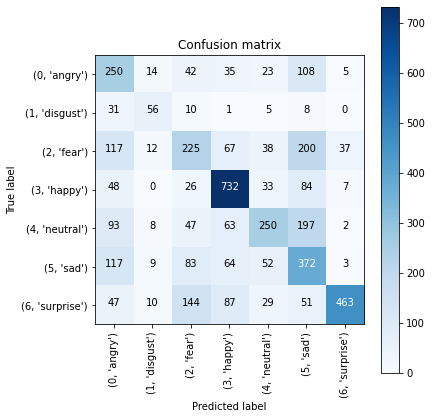

In [60]:

predictions = model.predict(X_test)
y_pred = [np.argmax(probas) for probas in predictions]


accuracy = accuracy_score(y_test, y_pred)
print('Test Accuracy = %.2f' % accuracy)

confusion_mtx = confusion_matrix(y_test, y_pred) 
cm = plot_confusion_matrix(confusion_mtx, classes = list(test_labels.items()), normalize=False)

In [61]:
from keras.preprocessing.image import ImageDataGenerator

datagen_test = ImageDataGenerator(rescale = 1./255)
pred_generator = datagen_test.flow_from_directory(TEST_DIR,
                                                 target_size = (48,48),
                                                 color_mode = "grayscale",
                                                 batch_size = batch_size,
                                                 class_mode = "categorical",
                                                 shuffle=False)

Found 4388 images belonging to 7 classes.


In [62]:
new_predictions = model.predict(X_test)
y_pred = [np.argmax(probas) for probas in new_predictions]
y_pred = [test_labels[k] for k in y_pred]

138/138 [==============================] - 2s 11ms/step


In [63]:
filenames = pred_generator.filenames
actual_class = [test_labels[h] for h in pred_generator.classes]

In [69]:
# from keras.optimizers import RMSprop,SGD,Adam
# from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# checkpoint = ModelCheckpoint("./model.h6", monitor='val_acc', verbose=1, save_best_only=True, mode='max')